--- Step 1: Synthetic Customer Data Generated ---
   Annual_Income_k  Spending_Score
0        -7.459200        6.479711
1       -10.115891       -6.945263
2         7.267642        1.003212
3        -2.979727        7.258068
4        -5.438170       -7.369800


--- Step 2: Data Scaled Successfully ---



C:\Users\tilak\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\tilak\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\tilak\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tilak\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

--- Step 3: Elbow Method Complete ---
Elbow curve saved as 'kmeans_elbow_curve.png'. The optimal k is where the elbow appears.

--- Step 4: K-Means Applied with k=4 ---

--- Step 5: Cluster Analysis ---
Average characteristics of each customer segment:
         Annual_Income_k  Spending_Score
Cluster                                 
0               4.738214        1.913993
1              -8.650179        7.481838
2              -7.025232       -6.909327
3              -2.620819        9.108065


C:\Users\tilak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Final segmentation plot saved as 'customer_segments.png'

--- Analysis Complete ---


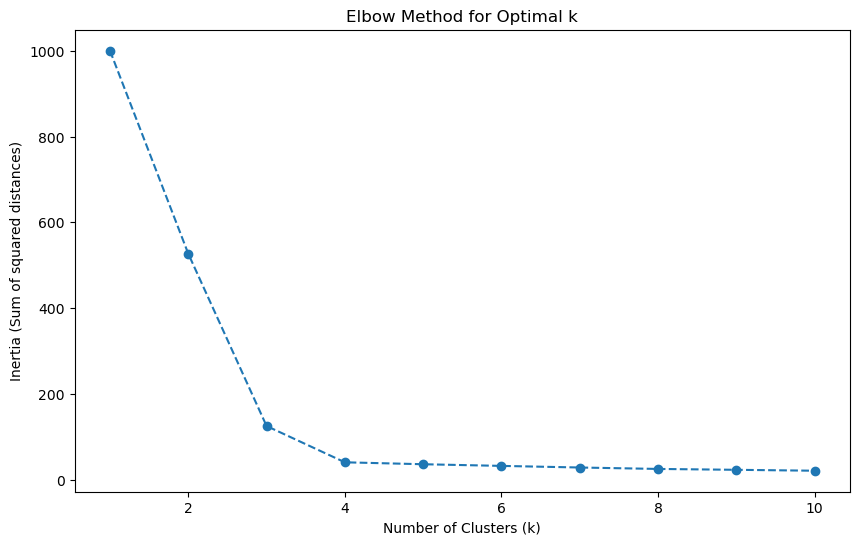

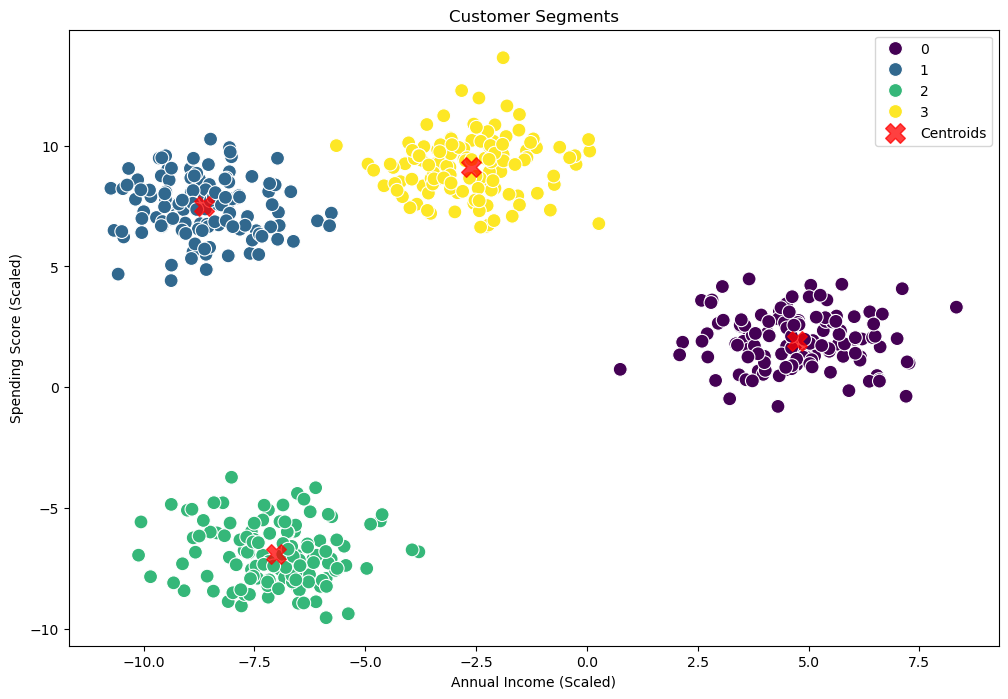

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Load (Generate) the Data ---
    # We create a synthetic dataset of 500 customers with 2 features.
    # We'll create 4 distinct groups (centers=4) to simulate customer segments.
    X, y = make_blobs(n_samples=500, centers=4, n_features=2,
                      cluster_std=1.2, random_state=42)

    df = pd.DataFrame(X, columns=['Annual_Income_k', 'Spending_Score'])
    
    print("--- Step 1: Synthetic Customer Data Generated ---")
    print(df.head())
    print("\n")

    # --- Step 2: Preprocess the Data ---
    # Scaling is crucial for K-Means as it's distance-based.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print("--- Step 2: Data Scaled Successfully ---\n")

    # --- Step 3: Find Optimal 'k' (Elbow Method) ---
    # We'll test k from 1 to 10 and find where the "elbow" of the curve is.
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Sum of squared distances)')
    plt.title('Elbow Method for Optimal k')
    plt.savefig('kmeans_elbow_curve.png')
    print("--- Step 3: Elbow Method Complete ---")
    print("Elbow curve saved as 'kmeans_elbow_curve.png'. The optimal k is where the elbow appears.\n")
    
    # --- Step 4: Apply K-Means ---
    # Based on the elbow curve, we choose the optimal k (which is 4).
    optimal_k = 4
    kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Add the cluster labels to our original dataframe
    df['Cluster'] = cluster_labels
    print(f"--- Step 4: K-Means Applied with k={optimal_k} ---\n")

    # --- Step 5: Analyze and Visualize Clusters ---
    # Calculate the average feature values for each cluster
    cluster_centers = df.groupby('Cluster').mean()
    
    print("--- Step 5: Cluster Analysis ---")
    print("Average characteristics of each customer segment:")
    print(cluster_centers)

    # Visualize the clusters
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='Annual_Income_k', y='Spending_Score', hue='Cluster', palette='viridis', s=100)
    # Plot the cluster centers
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
    plt.title('Customer Segments')
    plt.xlabel('Annual Income (Scaled)')
    plt.ylabel('Spending Score (Scaled)')
    plt.legend()
    plt.savefig('customer_segments.png')
    print("\nFinal segmentation plot saved as 'customer_segments.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")